In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Look at the columns in the Station table
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [10]:
# Look at the columns in the Measurements table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

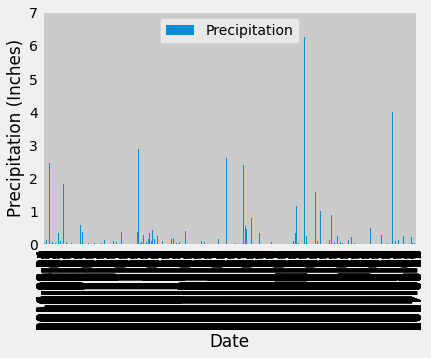

In [28]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
last_years_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
last_years_prcp_df = pd.DataFrame(last_years_prcp, columns = ["Date", "Precipitation"])
last_years_prcp_df.set_index("Date", inplace = True)

# Sort the dataframe by date
last_years_prcp_df = last_years_prcp_df.sort_values(by=["Date"])


# Use Pandas Plotting with Matplotlib to plot the data

last_years_prcp_df = last_years_prcp_df.dropna()
last_years_prcp_df.plot.bar()
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.show()

In [12]:
last_years_prcp_df

NameError: name 'last_years_prcp_df' is not defined

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_years_prcp_df["Precipitation"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query((Measurement.station), func.count(Measurement.date)).\
                group_by(Measurement.station).\
                order_by(func.count(Measurement.date).\
                desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
from numpy import mean

temp_data = session.query(Measurement.station, Measurement.tobs)

USC00519281_temps = []

for Measurement in temp_data:
    if (Measurement.station) == "USC00519281":
        USC00519281_temps.append(Measurement.tobs)

lowest_temp = min(USC00519281_temps)
highest_temp = max(USC00519281_temps)
mean_temp = mean(USC00519281_temps)

print(f"The lowest temperature at the Waihee station was {lowest_temp}")
print(f"The highest temperature at the Waihee station was {highest_temp}")
print(f"The average temperature at the Waihee station was {round(mean_temp,2)}")

The lowest temperature at the Waihee station was 54.0
The highest temperature at the Waihee station was 85.0
The average temperature at the Waihee station was 71.66


In [18]:
lowest_temperature = session.query(Measurement.station, func.min(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').all()
lowest_temperature

ArgumentError: Textual column expression 'USC00516128' should be explicitly declared with text('USC00516128'), or use column('USC00516128') for more specificity

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the date and temperature data
USC00519281_last_years_temp = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > year_ago).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
USC00519281_last_years_temp_df = pd.DataFrame(USC00519281_last_years_temp, columns = ["Date", "Temperature"])

# Sort the dataframe by date



# Use Pandas Plotting with Matplotlib to plot the data



AttributeError: Could not locate column in row for column 'date'

# Close session

In [19]:
# Close Session
session.close()